### **Stock Market Prediction And Forecasting Using Stacked LSTM**

In [1]:
import pandas_datareader as pdr
key=""

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key="5102be8a9fd69bbacddbb9d610976183b171a1b2")


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

### **Importing Dataset**

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-10-02 00:00:00+00:00,153.81,154.45,152.72,154.26,18524860,36.491937,36.643779,36.233331,36.598701,74099440,0.0,1.0
1,AAPL,2017-10-03 00:00:00+00:00,154.48,155.09,153.91,154.01,16146388,36.650896,36.795621,36.515662,36.539387,64585552,0.0,1.0
2,AAPL,2017-10-04 00:00:00+00:00,153.48,153.86,152.46,153.63,19844177,36.413643,36.503799,36.171645,36.449231,79376708,0.0,1.0
3,AAPL,2017-10-05 00:00:00+00:00,155.39,155.44,154.05,154.18,21032800,36.866797,36.878660,36.548877,36.579720,84131200,0.0,1.0
4,AAPL,2017-10-06 00:00:00+00:00,155.30,155.49,154.56,154.97,16423749,36.845444,36.890522,36.669877,36.767151,65694996,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-09-23 00:00:00+00:00,150.43,151.4700,148.560,151.19,96029909,150.43,151.4700,148.560,151.19,96029909,0.0,1.0
1254,AAPL,2022-09-26 00:00:00+00:00,150.77,153.7701,149.640,149.66,93339409,150.77,153.7701,149.640,149.66,93339409,0.0,1.0
1255,AAPL,2022-09-27 00:00:00+00:00,151.76,154.7200,149.945,152.74,84442741,151.76,154.7200,149.945,152.74,84442741,0.0,1.0
1256,AAPL,2022-09-28 00:00:00+00:00,149.84,150.6414,144.840,147.64,146691387,149.84,150.6414,144.840,147.64,146691387,0.0,1.0
1257,AAPL,2022-09-29 00:00:00+00:00,142.48,146.7200,140.680,146.10,128138237,142.48,146.7200,140.680,146.10,128138237,0.0,1.0


In [9]:
df1=df.reset_index()['close']
df1

0       153.81
1       154.48
2       153.48
3       155.39
4       155.30
         ...  
1253    150.43
1254    150.77
1255    151.76
1256    149.84
1257    142.48
Name: close, Length: 1258, dtype: float64

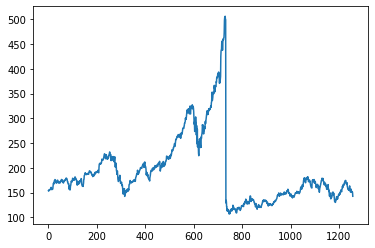

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
df1

0       153.81
1       154.48
2       153.48
3       155.39
4       155.30
         ...  
1253    150.43
1254    150.77
1255    151.76
1256    149.84
1257    142.48
Name: close, Length: 1258, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.11764559]
 [0.11932373]
 [0.11681904]
 ...
 [0.11251096]
 [0.10770194]
 [0.08926738]]


In [15]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(817, 441)

In [17]:
train_data

array([[1.17645585e-01],
       [1.19323732e-01],
       [1.16819036e-01],
       [1.21603006e-01],
       [1.21377583e-01],
       [1.22730119e-01],
       [1.22880401e-01],
       [1.24508453e-01],
       [1.23130870e-01],
       [1.25610520e-01],
       [1.32849092e-01],
       [1.34326863e-01],
       [1.32548528e-01],
       [1.23080776e-01],
       [1.23757044e-01],
       [1.23556669e-01],
       [1.25886036e-01],
       [1.24157796e-01],
       [1.26662492e-01],
       [1.40788979e-01],
       [1.49981215e-01],
       [1.55792110e-01],
       [1.50407013e-01],
       [1.53462743e-01],
       [1.64458359e-01],
       [1.68841578e-01],
       [1.70244208e-01],
       [1.73825924e-01],
       [1.72924233e-01],
       [1.69893550e-01],
       [1.68140263e-01],
       [1.61552912e-01],
       [1.55892298e-01],
       [1.60951785e-01],
       [1.58572323e-01],
       [1.58146525e-01],
       [1.66061365e-01],
       [1.70619912e-01],
       [1.70644959e-01],
       [1.68440827e-01],


In [18]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [23]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### **Exploratory Data Processing**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 8s 214ms/step - loss: 0.0499 - val_loss: 0.0026
Epoch 2/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0200 - val_loss: 0.0095
Epoch 3/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0142 - val_loss: 0.0011
Epoch 4/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0109 - val_loss: 8.2649e-04
Epoch 5/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0093 - val_loss: 4.2726e-04
Epoch 6/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0083 - val_loss: 3.3276e-04
Epoch 7/100
12/12 [==============================] - 2s 162ms/step - loss: 0.0075 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 2s 130ms/step - loss: 0.0064 - val_loss: 2.8738e-04
Epoch 9/100
12/12 [==============================] - 2s 153ms/step - loss: 0.0058 - val_loss: 3.0140e-04
Epoch 10/100
12/12 [==============================] - 2s 126ms/step - l

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.8.2'

In [31]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [32]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

234.88684619289492

In [34]:
math.sqrt(mean_squared_error(ytest,test_predict))

156.5209223947022

In [35]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [36]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

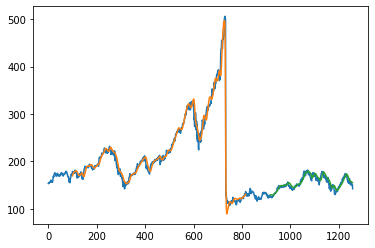

In [37]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

441

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.11326236693800873,
 0.11939887288666245,
 0.09933625547902314,
 0.08946775203506574,
 0.10086412022542268,
 0.09693174702567309,
 0.10619912335629306,
 0.08510958046336875,
 0.0764182842830306,
 0.07701941139636814,
 0.09084533500313086,
 0.08395742016280527,
 0.0843581715716969,
 0.09252348152786471,
 0.10720100187852216,
 0.10519724483406384,
 0.10487163431433938,
 0.11113337507827176,
 0.09653099561678141,
 0.09843456480901686,
 0.10487163431433938,
 0.10299311208515965,
 0.0896681277395115,
 0.07586725109580456,
 0.0627175954915466,
 0.06492172824045078,
 0.07160926737633061,
 0.05815904821540385,
 0.061916092673763246,
 0.0727113337507827,
 0.07140889167188474,
 0.07872260488415778,
 0.08721352536005006,
 0.08721352536005006,
 0.07664370695053219,
 0.08112711333750777,
 0.07484032561051968,
 0.08037570444583592,
 0.08696305572949276,
 0.09036944270507191,
 0.09896055103318718,
 0.10068879148403248,
 0.09525360050093923,
 0.0977332498434565,
 0.09680651221039449,
 0.104270507201

In [44]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11863235]
101
1 day input [0.11939887 0.09933626 0.08946775 0.10086412 0.09693175 0.10619912
 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817
 0.09252348 0.107201   0.10519724 0.10487163 0.11113338 0.096531
 0.09843456 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176
 0.06492173 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889
 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711 0.07484033
 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879 0.0952536
 0.09773325 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739
 0.11571697 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958
 0.12651221 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194
 0.14654978 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648
 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376 0.15211021
 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954
 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068 0.11927364
 0.1265623  0.14174076 0.11772073 0.1

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [46]:
import matplotlib.pyplot as plt

In [47]:
len(df1)

1258

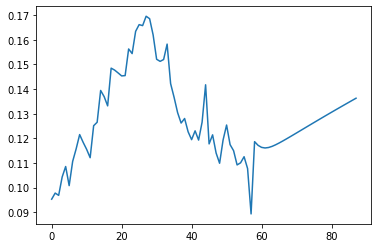

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

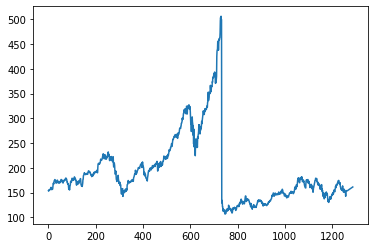

In [50]:
plt.plot(df3)